In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import numpy as np
import hashlib
import seaborn as sns


In [2]:
# Load the data flights and weather and location data
df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v3.csv", low_memory=False)

In [3]:
# Load the tswift_df with eras_tour data
tswift_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\extra_fun_data\Taylor_Swift_Eras_Tour.csv", low_memory=False)


In [4]:
tswift_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Tour Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Countdown!,Date,City,Stadium,Opener 1,Opener 2,Notes,NaN,NaN,NaN,NaN
3,NaN,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN,NaN,NaN,NaN
4,NaN,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN,NaN,NaN,NaN


In [5]:
# Investigate null values
nan_columns = tswift_df.columns[tswift_df.isna().all()].tolist()
print(nan_columns)

['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']


In [6]:
# Drop columns that are 100% NaN
tswift_df = tswift_df.dropna(axis=1, how='all')

# Drop rows that are 100% NaN
tswift_df = tswift_df.dropna(axis=0, how='all')


In [7]:
# Investigate null values
non_nan_rows = tswift_df[tswift_df['Unnamed: 1'].notna()]
print(non_nan_rows)


     Unnamed: 1         Unnamed: 2                            Unnamed: 3  \
1    Tour Dates                NaN                                   NaN   
2    Countdown!               Date                                  City   
125       #NUM!  Wed, Jul 24, 2024                                   NaN   
126           0  Sat, Jul 27, 2024                       Munich, Germany   
127           1  Sun, Jul 28, 2024                                   NaN   
128           5   Thu, Aug 1, 2024                        Warsaw, Poland   
129           6   Fri, Aug 2, 2024                                   NaN   
130           7   Sat, Aug 3, 2024                                   NaN   
131          12   Thu, Aug 8, 2024                       Vienna, Austria   
132          13   Fri, Aug 9, 2024                                   NaN   
133          14  Sat, Aug 10, 2024                                   NaN   
134          19  Thu, Aug 15, 2024                London, United Kingdom   
135         

In [8]:
tswift_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 11
1,Tour Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Countdown!,Date,City,Stadium,Opener 1,Opener 2,Notes,NaN
3,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN
4,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN
5,NaN,"Fri, Mar 24, 2023","Las Vegas, NV",ALLEGIANT STADIUM,beabadoobee,GAYLE,NaN,NaN


In [9]:
# Reformatting
# Drop the first two rows using iloc
tswift_df = tswift_df.iloc[2:].reset_index(drop=True)

# Display the updated DataFrame
print(tswift_df.head())


  Unnamed: 1         Unnamed: 2     Unnamed: 3          Unnamed: 4  \
0        NaN  Fri, Mar 17, 2023   Glendale, AZ  STATE FARM STADIUM   
1        NaN  Sat, Mar 18, 2023            NaN                 NaN   
2        NaN  Fri, Mar 24, 2023  Las Vegas, NV   ALLEGIANT STADIUM   
3        NaN  Sat, Mar 25, 2023            NaN                 NaN   
4        NaN  Fri, Mar 31, 2023  Arlington, TX        AT&T STADIUM   

    Unnamed: 5 Unnamed: 6     Unnamed: 7 Unnamed: 11  
0     Paramore      GAYLE  Opening Night         NaN  
1     Paramore      GAYLE            NaN         NaN  
2  beabadoobee      GAYLE            NaN         NaN  
3  beabadoobee      GAYLE            NaN         NaN  
4         MUNA      GAYLE            NaN         NaN  


In [10]:
tswift_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 11
0,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN
1,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN
2,NaN,"Fri, Mar 24, 2023","Las Vegas, NV",ALLEGIANT STADIUM,beabadoobee,GAYLE,NaN,NaN
3,NaN,"Sat, Mar 25, 2023",NaN,NaN,beabadoobee,GAYLE,NaN,NaN
4,NaN,"Fri, Mar 31, 2023","Arlington, TX",AT&T STADIUM,MUNA,GAYLE,NaN,NaN


In [11]:
# Reformatting
# Define the new column names
new_column_names = ['tour_date', 'tour_city', 'tour_stadium', 'tour_opener', 'notes']

# Replace the column names for the specified columns
tswift_df.columns = new_column_names + list(tswift_df.columns[len(new_column_names):])

# Display the updated DataFrame
print(tswift_df.head())


  tour_date          tour_city   tour_stadium         tour_opener  \
0       NaN  Fri, Mar 17, 2023   Glendale, AZ  STATE FARM STADIUM   
1       NaN  Sat, Mar 18, 2023            NaN                 NaN   
2       NaN  Fri, Mar 24, 2023  Las Vegas, NV   ALLEGIANT STADIUM   
3       NaN  Sat, Mar 25, 2023            NaN                 NaN   
4       NaN  Fri, Mar 31, 2023  Arlington, TX        AT&T STADIUM   

         notes Unnamed: 6     Unnamed: 7 Unnamed: 11  
0     Paramore      GAYLE  Opening Night         NaN  
1     Paramore      GAYLE            NaN         NaN  
2  beabadoobee      GAYLE            NaN         NaN  
3  beabadoobee      GAYLE            NaN         NaN  
4         MUNA      GAYLE            NaN         NaN  


In [12]:
# Drop rows where 'Tour Dates' column has NaN values
tswift_df = tswift_df.dropna(subset=['tour_date'])

# Reset the index after dropping rows
tswift_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(tswift_df.head())


  tour_date          tour_city     tour_stadium     tour_opener     notes  \
0     #NUM!  Wed, Jul 24, 2024              NaN             NaN  Paramore   
1         0  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion  Paramore   
2         1  Sun, Jul 28, 2024              NaN             NaN  Paramore   
3         5   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy  Paramore   
4         6   Fri, Aug 2, 2024              NaN             NaN  Paramore   

  Unnamed: 6 Unnamed: 7 Unnamed: 11  
0        NaN        NaN         NaN  
1        NaN        NaN         NaN  
2        NaN        NaN         NaN  
3        NaN        NaN         NaN  
4        NaN        NaN         NaN  


In [13]:
# Drop the 'tour_date' column
tswift_df = tswift_df.drop(columns=['tour_date'])

# Display the updated DataFrame
print(tswift_df.head())

           tour_city     tour_stadium     tour_opener     notes Unnamed: 6  \
0  Wed, Jul 24, 2024              NaN             NaN  Paramore        NaN   
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion  Paramore        NaN   
2  Sun, Jul 28, 2024              NaN             NaN  Paramore        NaN   
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy  Paramore        NaN   
4   Fri, Aug 2, 2024              NaN             NaN  Paramore        NaN   

  Unnamed: 7 Unnamed: 11  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  


In [14]:
# Define the new column names
new_column_names = ['tour_date', 'tour_city', 'tour_stadium', 'tour_opener', 'notes']

# Replace the column names for the specified columns
tswift_df.columns = new_column_names + list(tswift_df.columns[len(new_column_names):])

# Display the updated DataFrame
print(tswift_df.head())


           tour_date        tour_city    tour_stadium tour_opener notes  \
0  Wed, Jul 24, 2024              NaN             NaN    Paramore   NaN   
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion    Paramore   NaN   
2  Sun, Jul 28, 2024              NaN             NaN    Paramore   NaN   
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy    Paramore   NaN   
4   Fri, Aug 2, 2024              NaN             NaN    Paramore   NaN   

  Unnamed: 7 Unnamed: 11  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  


In [15]:
# Drop the specified columns
tswift_df = tswift_df.drop(columns=['notes', 'Unnamed: 7', 'Unnamed: 11'])

# Display the updated DataFrame
print(tswift_df.head())


           tour_date        tour_city    tour_stadium tour_opener
0  Wed, Jul 24, 2024              NaN             NaN    Paramore
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion    Paramore
2  Sun, Jul 28, 2024              NaN             NaN    Paramore
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy    Paramore
4   Fri, Aug 2, 2024              NaN             NaN    Paramore


In [16]:
# Ensure 'tour_date' is in datetime format for proper sorting
tswift_df['tour_date'] = pd.to_datetime(tswift_df['tour_date'])

# Sort the DataFrame by 'tour_date'
tswift_df = tswift_df.sort_values(by='tour_date').reset_index(drop=True)

# Fill NaN values in 'tour_city' with the nearest city name above it
tswift_df['tour_city'] = tswift_df['tour_city'].fillna(method='ffill')
tswift_df['tour_stadium'] = tswift_df['tour_stadium'].fillna(method='ffill')
# Display the updated DataFrame
print(tswift_df.head(-5))


    tour_date                 tour_city          tour_stadium    tour_opener
0  2024-07-24                       NaN                   NaN       Paramore
1  2024-07-27           Munich, Germany        Olympiastadion       Paramore
2  2024-07-28           Munich, Germany        Olympiastadion       Paramore
3  2024-08-01            Warsaw, Poland          PGE Narodowy       Paramore
4  2024-08-02            Warsaw, Poland          PGE Narodowy       Paramore
5  2024-08-03            Warsaw, Poland          PGE Narodowy       Paramore
6  2024-08-08           Vienna, Austria  Ernst-Happel-Stadion       Paramore
7  2024-08-09           Vienna, Austria  Ernst-Happel-Stadion       Paramore
8  2024-08-10           Vienna, Austria  Ernst-Happel-Stadion       Paramore
9  2024-08-15    London, United Kingdom       Wembley Stadium       Paramore
10 2024-08-16    London, United Kingdom       Wembley Stadium       Paramore
11 2024-08-17    London, United Kingdom       Wembley Stadium       Paramore

C:\Users\hopeh\AppData\Local\Temp\ipykernel_13192\4071595525.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tswift_df['tour_city'] = tswift_df['tour_city'].fillna(method='ffill')
C:\Users\hopeh\AppData\Local\Temp\ipykernel_13192\4071595525.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tswift_df['tour_stadium'] = tswift_df['tour_stadium'].fillna(method='ffill')


In [17]:
# Ensure 'tour_date' is in datetime format
tswift_df['tour_date'] = pd.to_datetime(tswift_df['tour_date'])

# Define the date range
start_date = '2023-05-01'
end_date = '2024-04-30'

# Filter the DataFrame for dates within the specified range
filtered_df = tswift_df[(tswift_df['tour_date'] >= start_date) & (tswift_df['tour_date'] <= end_date)]

# Reset the index for the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print(filtered_df)


Empty DataFrame
Columns: [tour_date, tour_city, tour_stadium, tour_opener]
Index: []


In [18]:
# create df eras_tour for eras_tour dates

eras_tour = {
    "Date": [
        "March 17", "March 18", "March 24", "March 25", "March 31", 
        "April 1", "April 2", "April 13", "April 14", "April 15", 
        "April 21", "April 22", "April 23", "April 28", "April 29", 
        "April 30", "May 5", "May 6", "May 7", "May 12", 
        "May 13", "May 14", "May 19", "May 20", "May 21", 
        "May 26", "May 27", "May 28", "June 2", "June 3", 
        "June 4", "June 9", "June 10", "June 16", "June 17", 
        "June 23", "June 24", "June 30", "July 1", "July 7", 
        "July 8", "July 14", "July 15", "July 22", "July 23", 
        "July 28", "July 29", "August 3", "August 4", "August 5", 
        "August 7", "August 8", "August 9"

    ],
    "City": [
        "Glendale", "Glendale", "Paradise", "Paradise", "Arlington", 
        "Arlington", "Arlington", "Tampa", "Tampa", "Tampa", 
        "Houston", "Houston", "Houston", "Atlanta", "Atlanta", 
        "Atlanta", "Nashville", "Nashville", "Nashville", "Philadelphia", 
        "Philadelphia", "Philadelphia", "Foxborough", "Foxborough", 
        "Foxborough", "East Rutherford", "East Rutherford", 
        "East Rutherford", "Chicago", "Chicago", "Chicago", 
        "Detroit", "Detroit", "Pittsburgh", "Pittsburgh", "Minneapolis", 
        "Minneapolis", "Cincinnati", "Cincinnati", "Kansas City", 
        "Kansas City", "Denver", "Denver", "Seattle", "Seattle", 
        "Santa Clara", "Santa Clara", "Inglewood", "Inglewood", 
        "Inglewood", "Inglewood", "Inglewood", "Inglewood", 
    ],
}

In [19]:
# Check lengths of lists in eras_tour
print("Lengths of eras_tour columns:")
for key, value in eras_tour.items():
    print(f"{key}: {len(value)}")


Lengths of eras_tour columns:
Date: 53
City: 53


In [20]:
## Created Eras Tour Dataframe based on taylorswift website
# Creating DataFrame
eras_tour = pd.DataFrame(eras_tour)


In [21]:
eras_tour.head(12)

,Date,City
0,March 17,Glendale
1,March 18,Glendale
2,March 24,Paradise
3,March 25,Paradise
4,March 31,Arlington
5,April 1,Arlington
6,April 2,Arlington
7,April 13,Tampa
8,April 14,Tampa
9,April 15,Tampa


In [22]:
# Mapping of cities to IATA codes for the nearest large airports
iata_mapping = {
    "Glendale": "PHX",          # Phoenix Sky Harbor International Airport
    "Paradise": "LAS",          # Harry Reid International Airport (Las Vegas)
    "Arlington": "DFW",         # Dallas/Fort Worth International Airport
    "Tampa": "TPA",             # Tampa International Airport
    "Houston": "IAH",           # George Bush Intercontinental Airport
    "Atlanta": "ATL",           # Hartsfield-Jackson Atlanta International Airport
    "Nashville": "BNA",         # Nashville International Airport
    "Philadelphia": "PHL",      # Philadelphia International Airport
    "Foxborough": "BOS",        # Logan International Airport (Boston)
    "East Rutherford": "EWR",   # Newark Liberty International Airport
    "Chicago": "ORD",           # O'Hare International Airport
    "Detroit": "DTW",           # Detroit Metropolitan Airport
    "Pittsburgh": "PIT",        # Pittsburgh International Airport
    "Minneapolis": "MSP",       # Minneapolis–Saint Paul International Airport
    "Cincinnati": "CVG",        # Cincinnati/Northern Kentucky International Airport
    "Kansas City": "MCI",       # Kansas City International Airport
    "Denver": "DEN",            # Denver International Airport
    "Seattle": "SEA",           # Seattle–Tacoma International Airport
    "Santa Clara": "SJC",       # San Jose International Airport
    "Inglewood": "LAX",         # Los Angeles International Airport
    "Mexico City": "MEX",       # Mexico City International Airport
    "Buenos Aires": "EZE",      # Ministro Pistarini International Airport
    "Rio de Janeiro": "GIG",    # Rio de Janeiro/Galeão International Airport
    "São Paulo": "GRU",         # São Paulo/Guarulhos–Governador André Franco Montoro International Airport
    "Tokyo": "NRT",             # Narita International Airport
    "Melbourne": "MEL",         # Melbourne Airport
    "Sydney": "SYD",            # Sydney Kingsford Smith Airport
    "Singapore": "SIN",         # Singapore Changi Airport
}

# Use this mapping to create a new column 


In [23]:
# Function to map city to IATA code
def get_iata_code(city):
    return iata_mapping.get(city, None)

# Create a new column for IATA codes
eras_tour['IATA'] = eras_tour['City'].apply(get_iata_code)

# Display the updated DataFrame
print(eras_tour)

        Date             City IATA
0   March 17         Glendale  PHX
1   March 18         Glendale  PHX
2   March 24         Paradise  LAS
3   March 25         Paradise  LAS
4   March 31        Arlington  DFW
5    April 1        Arlington  DFW
6    April 2        Arlington  DFW
7   April 13            Tampa  TPA
8   April 14            Tampa  TPA
9   April 15            Tampa  TPA
10  April 21          Houston  IAH
11  April 22          Houston  IAH
12  April 23          Houston  IAH
13  April 28          Atlanta  ATL
14  April 29          Atlanta  ATL
15  April 30          Atlanta  ATL
16     May 5        Nashville  BNA
17     May 6        Nashville  BNA
18     May 7        Nashville  BNA
19    May 12     Philadelphia  PHL
20    May 13     Philadelphia  PHL
21    May 14     Philadelphia  PHL
22    May 19       Foxborough  BOS
23    May 20       Foxborough  BOS
24    May 21       Foxborough  BOS
25    May 26  East Rutherford  EWR
26    May 27  East Rutherford  EWR
27    May 28  East R

In [24]:

# Convert the 'Date' column to datetime format using the year 2023
eras_tour['Date'] = pd.to_datetime(eras_tour['Date'] + ' 2023', format='%B %d %Y')

# Review the updated DataFrame
print(eras_tour)

         Date             City IATA
0  2023-03-17         Glendale  PHX
1  2023-03-18         Glendale  PHX
2  2023-03-24         Paradise  LAS
3  2023-03-25         Paradise  LAS
4  2023-03-31        Arlington  DFW
5  2023-04-01        Arlington  DFW
6  2023-04-02        Arlington  DFW
7  2023-04-13            Tampa  TPA
8  2023-04-14            Tampa  TPA
9  2023-04-15            Tampa  TPA
10 2023-04-21          Houston  IAH
11 2023-04-22          Houston  IAH
12 2023-04-23          Houston  IAH
13 2023-04-28          Atlanta  ATL
14 2023-04-29          Atlanta  ATL
15 2023-04-30          Atlanta  ATL
16 2023-05-05        Nashville  BNA
17 2023-05-06        Nashville  BNA
18 2023-05-07        Nashville  BNA
19 2023-05-12     Philadelphia  PHL
20 2023-05-13     Philadelphia  PHL
21 2023-05-14     Philadelphia  PHL
22 2023-05-19       Foxborough  BOS
23 2023-05-20       Foxborough  BOS
24 2023-05-21       Foxborough  BOS
25 2023-05-26  East Rutherford  EWR
26 2023-05-27  East Rutherfo

In [25]:
eras_tour['eras_tour'] = "tour_date"

In [26]:
eras_tour

,Date,City,IATA,eras_tour
0,2023-03-17,Glendale,PHX,tour_date
1,2023-03-18,Glendale,PHX,tour_date
2,2023-03-24,Paradise,LAS,tour_date
3,2023-03-25,Paradise,LAS,tour_date
4,2023-03-31,Arlington,DFW,tour_date
5,2023-04-01,Arlington,DFW,tour_date
6,2023-04-02,Arlington,DFW,tour_date
7,2023-04-13,Tampa,TPA,tour_date
8,2023-04-14,Tampa,TPA,tour_date
9,2023-04-15,Tampa,TPA,tour_date


In [27]:
# Save the eras_tour DataFrame to a CSV file
eras_tour.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\eras_tour_data.csv', index=False)


In [28]:
# combined data is cleaned flight and weather data
# Load the data
eras_tour_df = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\eras_tour_data.csv')


In [29]:
eras_tour_df.columns

Index(['Date', 'City', 'IATA', 'eras_tour'], dtype='object')

In [30]:
filtered_df.columns

Index(['tour_date', 'tour_city', 'tour_stadium', 'tour_opener'], dtype='object')

In [31]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [32]:
# Ensure both date columns are in the same format (if necessary)
df['date'] = pd.to_datetime(df['date'])
eras_tour_df['Date'] = pd.to_datetime(eras_tour_df['Date'])

print(df['date'].unique())
print(eras_tour_df['Date'].unique())
print(df['origin_iata'].unique())
print(df['dest_iata'].unique())
print(eras_tour_df['IATA'].unique())


<DatetimeArray>
['2023-05-01 00:00:00', '2023-05-02 00:00:00', '2023-05-03 00:00:00',
 '2023-05-04 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-08 00:00:00', '2023-05-09 00:00:00',
 '2023-05-10 00:00:00',
 ...
 '2024-04-21 00:00:00', '2024-04-22 00:00:00', '2024-04-23 00:00:00',
 '2024-04-24 00:00:00', '2024-04-25 00:00:00', '2024-04-26 00:00:00',
 '2024-04-27 00:00:00', '2024-04-28 00:00:00', '2024-04-29 00:00:00',
 '2024-04-30 00:00:00']
Length: 366, dtype: datetime64[ns]
<DatetimeArray>
['2023-03-17 00:00:00', '2023-03-18 00:00:00', '2023-03-24 00:00:00',
 '2023-03-25 00:00:00', '2023-03-31 00:00:00', '2023-04-01 00:00:00',
 '2023-04-02 00:00:00', '2023-04-13 00:00:00', '2023-04-14 00:00:00',
 '2023-04-15 00:00:00', '2023-04-21 00:00:00', '2023-04-22 00:00:00',
 '2023-04-23 00:00:00', '2023-04-28 00:00:00', '2023-04-29 00:00:00',
 '2023-04-30 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-12 00:0

In [33]:
# Standardize only string columns using applymap
eras_tour_df = eras_tour_df.apply(lambda col: col.str.strip().str.lower() if col.dtype == 'object' else col)
df = df.apply(lambda col: col.str.strip().str.lower() if col.dtype == 'object' else col)

# Check the changes
print(eras_tour_df.head())
print(df.head())



        Date       City IATA  eras_tour
0 2023-03-17   glendale  phx  tour_date
1 2023-03-18   glendale  phx  tour_date
2 2023-03-24   paradise  las  tour_date
3 2023-03-25   paradise  las  tour_date
4 2023-03-31  arlington  dfw  tour_date
  day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday 2023-05-01                9e   n131ev               4888   
1      monday 2023-05-01                9e   n131ev               4888   
2      monday 2023-05-01                9e   n131ev               4888   
3      monday 2023-05-01                9e   n131ev               4888   
4      monday 2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg  cincinnati       msp  minneapolis           754  ...   
1         cvg  cincinnati       msp  minneapolis           754  ...   
2         cvg  cincinnati       msp  minneapolis           754  ...   
3         cvg  cincinnati      

In [34]:
# Ensure both date columns are in the same format (if necessary)
df['date'] = pd.to_datetime(df['date'])
eras_tour_df['Date'] = pd.to_datetime(eras_tour_df['Date'])

print(df['date'].unique())
print(eras_tour_df['Date'].unique())
print(df['origin_iata'].unique())
print(df['dest_iata'].unique())
print(eras_tour_df['IATA'].unique())


<DatetimeArray>
['2023-05-01 00:00:00', '2023-05-02 00:00:00', '2023-05-03 00:00:00',
 '2023-05-04 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-08 00:00:00', '2023-05-09 00:00:00',
 '2023-05-10 00:00:00',
 ...
 '2024-04-21 00:00:00', '2024-04-22 00:00:00', '2024-04-23 00:00:00',
 '2024-04-24 00:00:00', '2024-04-25 00:00:00', '2024-04-26 00:00:00',
 '2024-04-27 00:00:00', '2024-04-28 00:00:00', '2024-04-29 00:00:00',
 '2024-04-30 00:00:00']
Length: 366, dtype: datetime64[ns]
<DatetimeArray>
['2023-03-17 00:00:00', '2023-03-18 00:00:00', '2023-03-24 00:00:00',
 '2023-03-25 00:00:00', '2023-03-31 00:00:00', '2023-04-01 00:00:00',
 '2023-04-02 00:00:00', '2023-04-13 00:00:00', '2023-04-14 00:00:00',
 '2023-04-15 00:00:00', '2023-04-21 00:00:00', '2023-04-22 00:00:00',
 '2023-04-23 00:00:00', '2023-04-28 00:00:00', '2023-04-29 00:00:00',
 '2023-04-30 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-12 00:0

In [35]:
# Perform a merge to find matches
merged_data = pd.merge(df, eras_tour_df, how='left', left_on=['date', 'origin_iata'], right_on=['Date', 'IATA'],suffixes=('', '_orig'))
merged_data = pd.merge(merged_data, eras_tour_df, how='left', left_on=['date', 'dest_iata'], right_on=['Date', 'IATA'], suffixes=('', '_dest'))

# Update 'era_tour' based on the matches found
df['eras_tour'] = merged_data.apply(lambda x: 'tour_date' if x['Date'] is not pd.NaT else '', axis=1)

# Drop any unnecessary columns if needed


In [36]:
# Count the number of rows where 'tour_date' is not empty
flights_tour_date_count = df['eras_tour'].value_counts().get('tour_date', 0)

print(f"Number of rows with 'tour_date' set: {flights_tour_date_count}")


Number of rows with 'tour_date' set: 32355


In [37]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [38]:
# View multiple columns 
print(df[['dep_time', 'crs_dep_time', 'arr_time', 'crs_arr_time']])


          dep_time  crs_dep_time  arr_time  crs_arr_time
0            745.0           754     790.0           821
1            745.0           754     790.0           821
2            745.0           754     790.0           821
3            745.0           754     790.0           821
4           1064.0          1070    1134.0          1145
...            ...           ...       ...           ...
15118728    1015.0          1020    1076.0          1094
15118729    1015.0          1020    1076.0          1094
15118730     761.0           768     840.0           849
15118731     761.0           768     840.0           849
15118732     761.0           768     840.0           849

[15118733 rows x 4 columns]


In [39]:
df.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,tmin_dest,iata_dest_dest,weather_indicator,airport_indicator,total_delay_time,is_weekend,arrival_delay,departure_delay,airline_name,eras_tour
0,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
1,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
2,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
3,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
4,monday,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1070,...,NaN,NaN,0.0,0.0,-5.0,0,-11.0,-6.0,envoy air,


In [40]:
# SAVE / LOAD

In [41]:
#SAVE TO CSV 
#df.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\all_combined_data.csv', index=False)
# Last saved ib 11.6.24 at 8:20pm

In [42]:
#load the data
#combined_data = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\all_combined_data.csv', low_memory=False)
#SAVE TO CSV 


In [43]:
df.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,tmin_dest,iata_dest_dest,weather_indicator,airport_indicator,total_delay_time,is_weekend,arrival_delay,departure_delay,airline_name,eras_tour
0,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
1,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
2,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
3,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,
4,monday,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1070,...,NaN,NaN,0.0,0.0,-5.0,0,-11.0,-6.0,envoy air,


In [44]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [45]:
# View a  column
print(df[['crs_dep_time', 'crs_arr_time', 'arr_time', 'dep_time']])

          crs_dep_time  crs_arr_time  arr_time  dep_time
0                  754           821     790.0     745.0
1                  754           821     790.0     745.0
2                  754           821     790.0     745.0
3                  754           821     790.0     745.0
4                 1070          1145    1134.0    1064.0
...                ...           ...       ...       ...
15118728          1020          1094    1076.0    1015.0
15118729          1020          1094    1076.0    1015.0
15118730           768           849     840.0     761.0
15118731           768           849     840.0     761.0
15118732           768           849     840.0     761.0

[15118733 rows x 4 columns]


In [46]:
### ADD IN NFL DATA HERE ## 

In [47]:
### Load data

nfl_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\nfl_iata.csv")

In [48]:
nfl_df.columns

Index(['Team', 'Date', 'Location', 'Opponent', 'IATA Code', 'Game Week'], dtype='object')

In [49]:
#Strip Whitespace from All String Columns in a DataFrame
# Function to strip whitespace and convert to lowercase for all string columns
def strip_and_lower_string_columns(df):
    for col in df.select_dtypes(include=['object']):  # Select only object (string) columns
        df[col] = df[col].str.strip().str.lower()  # Apply strip and lower to each string column
    return df

# Apply the function to both DataFrames
df = strip_and_lower_string_columns(df)
nfl_df = strip_and_lower_string_columns(nfl_df)

# Display the cleaned DataFrames (optional)
print(df.head())
print(nfl_df.head())


  day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday 2023-05-01                9e   n131ev               4888   
1      monday 2023-05-01                9e   n131ev               4888   
2      monday 2023-05-01                9e   n131ev               4888   
3      monday 2023-05-01                9e   n131ev               4888   
4      monday 2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg  cincinnati       msp  minneapolis           754  ...   
1         cvg  cincinnati       msp  minneapolis           754  ...   
2         cvg  cincinnati       msp  minneapolis           754  ...   
3         cvg  cincinnati       msp  minneapolis           754  ...   
4         dsm  des moines       msp  minneapolis          1070  ...   

   tmin_dest  iata_dest_dest  weather_indicator  airport_indicator  \
0        NaN             NaN                0.0           

In [50]:
nfl_df.head()

,Team,Date,Location,Opponent,IATA Code,Game Week
0,arizona cardinals,2023-09-10,away,washington commanders,dca,36.0
1,arizona cardinals,2023-12-10,home,new york giants,phx,37.0
2,arizona cardinals,2023-09-24,home,dallas cowboys,phx,38.0
3,arizona cardinals,2023-10-01,away,san francisco 49ers,sfo,39.0
4,arizona cardinals,2023-10-22,home,cincinnati bengals,phx,40.0


In [51]:
# Standardize column names to lowercase and remove whitespace
nfl_df.columns = nfl_df.columns.str.lower().str.replace(r'\s+', '_', regex=True)

# Check the updated column names
print(nfl_df.columns.tolist())


['team', 'date', 'location', 'opponent', 'iata_code', 'game_week']


In [52]:
# Check the updated column names
print(nfl_df.columns.tolist())

['team', 'date', 'location', 'opponent', 'iata_code', 'game_week']


In [53]:
# Convert date columns to datetime format if they are not already
df['date'] = pd.to_datetime(df['date'])
nfl_df['nfl_game_date'] = pd.to_datetime(nfl_df['date'])

In [54]:
# Check unique values in the 'nfl_game_date' column
unique_dates = nfl_df['nfl_game_date'].unique()

# Print the unique values
print(unique_dates)


<DatetimeArray>
['2023-09-10 00:00:00', '2023-12-10 00:00:00', '2023-09-24 00:00:00',
 '2023-10-01 00:00:00', '2023-10-22 00:00:00', '2023-12-03 00:00:00',
 '2023-12-24 00:00:00', '2023-10-08 00:00:00', '2023-10-15 00:00:00',
 '2023-12-17 00:00:00', '2023-11-05 00:00:00', '2023-11-12 00:00:00',
 '2023-12-31 00:00:00', '2024-01-06 00:00:00', '2023-09-17 00:00:00',
 '2023-11-19 00:00:00', '2024-01-07 00:00:00', '2023-10-29 00:00:00',
 '2023-11-26 00:00:00']
Length: 19, dtype: datetime64[ns]


In [55]:
# Filter for Chicago Bears home games where 'iata_code' is 'ORD'
bears_home_games = nfl_df[(nfl_df['team'] == 'chicago bears') & 
                           (nfl_df['iata_code'] == 'ord')]

# Display relevant columns: Game date and opponent for reference
print(bears_home_games[['nfl_game_date', 'opponent', 'iata_code']])


   nfl_game_date           opponent iata_code
84    2023-09-24  green bay packers       ord
87    2023-10-01     denver broncos       ord
89    2023-11-12  minnesota vikings       ord
90    2023-10-22  las vegas raiders       ord
93    2023-11-12  carolina panthers       ord
96    2023-12-10      detroit lions       ord
98    2023-12-24  arizona cardinals       ord
99    2023-10-15    atlanta falcons       ord


In [56]:
nfl_df.columns

Index(['team', 'date', 'location', 'opponent', 'iata_code', 'game_week',
       'nfl_game_date'],
      dtype='object')

In [57]:
# Display the unique values in the 'Team' column
# Filter the DataFrame for rows where the team is 'Chicago Bears'
bears_df = nfl_df[nfl_df['team'] == 'chicago bears']

# Display the first few rows (head) of the filtered DataFrame
print(bears_df.head())


             team        date location               opponent iata_code  \
84  chicago bears  2023-09-24     home      green bay packers       ord   
85  chicago bears  2023-11-05     away   tampa bay buccaneers       tpa   
86  chicago bears  2023-09-24     away     kansas city chiefs       mci   
87  chicago bears  2023-10-01     home         denver broncos       ord   
88  chicago bears  2023-10-08     away  washington commanders       dca   

    game_week nfl_game_date  
84       36.0    2023-09-24  
85       37.0    2023-11-05  
86       38.0    2023-09-24  
87       39.0    2023-10-01  
88       40.0    2023-10-08  


In [58]:

# Ensure the 'date' column in combined_data is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure the 'Date' column in nfl_game_date is datetime using .loc
nfl_df.loc[:, 'nfl_game_date'] = pd.to_datetime(nfl_df['nfl_game_date'], errors='coerce')



In [59]:
# Merge nfl_df with combined_data on 'date' and matching IATA codes
merged_data = df.merge(
    nfl_df,
    how='left',
    left_on=['date', 'origin_iata'],
    right_on=['nfl_game_date', 'iata_code'],
    suffixes=('', '_nfl_origin')
).merge(
    nfl_df,
    how='left',
    left_on=['date', 'dest_iata'],
    right_on=['nfl_game_date', 'iata_code'],
    suffixes=('', '_nfl_dest')
)


In [60]:
# Check the relevant columns in merged_data for both origin and destination IATA codes
print(merged_data[['iata_code', 'iata_code_nfl_dest']].head())


  iata_code iata_code_nfl_dest
0       NaN                NaN
1       NaN                NaN
2       NaN                NaN
3       NaN                NaN
4       NaN                NaN


In [61]:

# Display the first few unique dates (if there are many)
print(unique_dates[:10])  # Show first 10 unique dates

<DatetimeArray>
['2023-09-10 00:00:00', '2023-12-10 00:00:00', '2023-09-24 00:00:00',
 '2023-10-01 00:00:00', '2023-10-22 00:00:00', '2023-12-03 00:00:00',
 '2023-12-24 00:00:00', '2023-10-08 00:00:00', '2023-10-15 00:00:00',
 '2023-12-17 00:00:00']
Length: 10, dtype: datetime64[ns]


In [62]:
# Get a summary of 'date' column
date_summary = merged_data['date'].describe()
print(date_summary)


count                         15564480
mean     2023-10-30 07:08:39.361009664
min                2023-05-01 00:00:00
25%                2023-08-02 00:00:00
50%                2023-10-29 00:00:00
75%                2024-01-27 00:00:00
max                2024-04-30 00:00:00
Name: date, dtype: object


In [63]:
# View unique dates in 'date' column
unique_dates = merged_data['date'].unique()
print(unique_dates)

# Check the column names after the merge
print(merged_data.columns)


<DatetimeArray>
['2023-05-01 00:00:00', '2023-05-02 00:00:00', '2023-05-03 00:00:00',
 '2023-05-04 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-08 00:00:00', '2023-05-09 00:00:00',
 '2023-05-10 00:00:00',
 ...
 '2024-04-21 00:00:00', '2024-04-22 00:00:00', '2024-04-23 00:00:00',
 '2024-04-24 00:00:00', '2024-04-25 00:00:00', '2024-04-26 00:00:00',
 '2024-04-27 00:00:00', '2024-04-28 00:00:00', '2024-04-29 00:00:00',
 '2024-04-30 00:00:00']
Length: 366, dtype: datetime64[ns]
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay

In [64]:
# Initialize the 'NFL_game' column to 'no' (default value)
merged_data['nfl_game'] = 'no'

# Update the 'nfl_game' column to 'game_day' if the corresponding IATA Code is matched (i.e., there is an NFL game)
merged_data['nfl_game'] = np.where(
    (merged_data['iata_code'].notnull()) | (merged_data['iata_code_nfl_dest'].notnull()), 
    'game_day', 
    merged_data['nfl_game']
)

# Now, merged_data has the 'NFL_game' column indicating whether there is a game
# If you want the result in combined_data, you can copy it back
df['nfl_game'] = merged_data['nfl_game']

# Optional: Check if everything looks good
print(df[['date', 'origin_iata', 'dest_iata', 'nfl_game']].head())


        date origin_iata dest_iata nfl_game
0 2023-05-01         cvg       msp       no
1 2023-05-01         cvg       msp       no
2 2023-05-01         cvg       msp       no
3 2023-05-01         cvg       msp       no
4 2023-05-01         dsm       msp       no


In [65]:
# Filter the rows where 'nfl_game' is 'game_day'
nfl_game_dates = df[df['nfl_game'] == 'game_day']

# Show relevant columns, including 'date', 'origin_iata', 'dest_iata', and 'nfl_game'
print(nfl_game_dates[['date', 'origin_iata', 'dest_iata', 'nfl_game']].head())


              date origin_iata dest_iata  nfl_game
5494212 2023-09-10         atl       fay  game_day
5494213 2023-09-10         atl       fay  game_day
5494214 2023-09-10         atl       fay  game_day
5494215 2023-09-10         atl       fay  game_day
5494216 2023-09-10         atl       fay  game_day


In [66]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [67]:
# Create a function to hash the values of each column
def column_hash(col):
    return hashlib.md5(pd.util.hash_pandas_object(col).values).hexdigest()

# Apply the hash function to all columns and find duplicates
column_hashes = df.apply(column_hash)

# Identify duplicates
duplicates = column_hashes.duplicated(keep='first')  # Keep the first occurrence of each duplicate

# Drop duplicate columns
df_cleaned = df.loc[:, ~duplicates]

# check the cleaned DataFrame
print(df_cleaned.head())


  day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday 2023-05-01                9e   n131ev               4888   
1      monday 2023-05-01                9e   n131ev               4888   
2      monday 2023-05-01                9e   n131ev               4888   
3      monday 2023-05-01                9e   n131ev               4888   
4      monday 2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg  cincinnati       msp  minneapolis           754  ...   
1         cvg  cincinnati       msp  minneapolis           754  ...   
2         cvg  cincinnati       msp  minneapolis           754  ...   
3         cvg  cincinnati       msp  minneapolis           754  ...   
4         dsm  des moines       msp  minneapolis          1070  ...   

   iata_dest_dest  weather_indicator  airport_indicator  total_delay_time  \
0             NaN                0.0               

In [68]:
df_cleaned.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_d

In [69]:
print(nfl_df.columns)


Index(['team', 'date', 'location', 'opponent', 'iata_code', 'game_week',
       'nfl_game_date'],
      dtype='object')


In [70]:
df_cleaned.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_d

In [71]:
# check the resulting DataFrame
print(df_cleaned.shape)
print(df_cleaned.columns)

(15118733, 69)
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs

In [72]:
# Get unique values in the 'nfl_game' column
unique_nfl_game_values = df_cleaned['nfl_game'].unique()

# Print the unique values
print("Unique values in 'nfl_game':", unique_nfl_game_values)


Unique values in 'nfl_game': ['no' 'game_day']


In [73]:
# Sort the 'date' column from oldest to newest
df_cleaned = df_cleaned.sort_values(by='date', ascending=True)

# Reset the index after sorting if needed 
df_cleaned = df_cleaned.reset_index(drop=True)


In [74]:
# Filter and display rows where nfl_games is not 'no'
nfl_games_filtered = df_cleaned[df_cleaned['nfl_game'] != 'no']

# Display the result
print(nfl_games_filtered)

         day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
5494260       sunday 2023-09-10                oo   n932ev               5059   
5494261       sunday 2023-09-10                oo   n932ev               5034   
5494320       sunday 2023-09-10                oo   n932ev               5059   
5494376       sunday 2023-09-10                oo   n932ev               5059   
5494378       sunday 2023-09-10                oo   n933ev               4675   
...              ...        ...               ...      ...                ...   
10923910      friday 2024-01-19                dl   n658dl               2521   
10923911      friday 2024-01-19                dl   n658dl               2521   
10923912      friday 2024-01-19                dl   n658dl               2521   
10923913      friday 2024-01-19                dl   n665dn               2107   
10923914      friday 2024-01-19                dl   n658dl               1133   

         origin_iata      o

In [75]:
df_cleaned.head(-10)

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,iata_dest_dest,weather_indicator,airport_indicator,total_delay_time,is_weekend,arrival_delay,departure_delay,airline_name,eras_tour,nfl_game
0,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,NaN,0.0,0.0,-22.0,0,-31.0,-9.0,envoy air,,no
1,monday,2023-05-01,oo,n905ev,5331,sbn,south bend,ord,chicago,460,...,NaN,0.0,0.0,3.0,0,-3.0,-6.0,skywest airlines,,no
2,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,NaN,0.0,0.0,21.0,0,13.0,-8.0,skywest airlines,,no
3,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,NaN,0.0,4500.0,21.0,0,13.0,-8.0,skywest airlines,,no
4,monday,2023-05-01,oo,n908ev,5529,lax,los angeles,rdd,redding,660,...,NaN,0.0,0.0,16.0,0,8.0,-8.0,skywest airlines,,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15118718,tuesday,2024-04-30,dl,n584nw,819,fll,fort lauderdale,dtw,detroit,800,...,NaN,0.0,0.0,-8.0,0,-10.0,-2.0,delta air lines,,no
15118719,tuesday,2024-04-30,dl,n584nw,819,fll,fort lauderdale,dtw,detroit,800,...,NaN,0.0,70.0,-8.0,0,-10.0,-2.0,delta air lines,,no
15118720,tuesday,2024-04-30,dl,n585nw,878,mco,orlando,msp,minneapolis,1105,...,NaN,0.0,0.0,10.0,0,9.0,-1.0,delta air lines,,no
15118721,tuesday,2024-04-30,dl,n585nw,878,mco,orlando,msp,minneapolis,1105,...,NaN,0.0,0.0,10.0,0,9.0,-1.0,delta air lines,,no


In [76]:
# Count the number of 'yes' in the nfl_game column
nfl_game_count = df_cleaned['nfl_game'].value_counts().get('game_day', 0)

print(f"Number of 'yes' in the nfl_game column: {nfl_game_count}")


Number of 'yes' in the nfl_game column: 862259


In [77]:
# Initialize an empty list to hold unique columns
unique_columns = []

# Set to track seen columns
seen = set()

# Process columns in chunks
chunk_size = 100  # Adjust this size based on your memory and performance
for start in range(0, df_cleaned.shape[1], chunk_size):
    end = min(start + chunk_size, df_cleaned.shape[1])
    chunk = df_cleaned.iloc[:, start:end]
    
    # Identify duplicates in the current chunk
    for col in chunk.columns:
        if col not in seen:
            unique_columns.append(col)
            seen.add(col)

# Ensure only existing columns are kept
existing_columns = [col for col in unique_columns if col in df_cleaned.columns]

# Create a new DataFrame with only unique and existing columns
df_cleaned = df_cleaned[existing_columns]

# Display the cleaned DataFrame's columns
print("Columns after removing duplicate columns:")
print(df_cleaned.columns)


Columns after removing duplicate columns:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tma

In [78]:
# Check what columns are being excluded
missing_columns = [col for col in unique_columns if col not in df_cleaned.columns]
print(f"Missing columns: {missing_columns}")


Missing columns: []


In [79]:
# Define a dictionary mapping missing columns to available ones
column_mapping = {
    'latitude_dest': 'dest_latitude',
    'longitude_dest': 'dest_longitude',
    'elevation_dest': 'elevation_ft',  # Use 'elevation_ft' as an example if relevant
    'prcp_dest': 'prcp_orig',          # You might want to check if 'prcp_orig' corresponds to 'prcp_dest'
    'snow_dest': 'snow_orig',          # Similarly, map 'snow_dest' to 'snow_orig'
    'snwd_dest': 'snwd_orig',          # Same as above
    'tmax_dest': 'tmax_orig',          # Use 'tmax_orig' if it represents the same thing
    'tmin_dest': 'tmin_orig',          # Similarly for 'tmin_dest'
}

# List of target columns you want to keep
target_columns = [
    'latitude_dest', 'longitude_dest', 'elevation_dest', 'prcp_dest',
    'snow_dest', 'snwd_dest', 'tmax_dest', 'tmin_dest'
]

# Check which columns are missing in the DataFrame
missing_columns = [col for col in target_columns if col not in df_cleaned.columns]

# Print the missing columns (if any)
print("Missing columns:", missing_columns)

# Handle missing columns by replacing them with the available columns
for missing_col in missing_columns:
    if missing_col in column_mapping:
        available_col = column_mapping[missing_col]
        if available_col in df_cleaned.columns:
            print(f"Using '{available_col}' as a replacement for '{missing_col}'")
            df_cleaned[missing_col] = df_cleaned[available_col]  # Create a new column as replacement


# Check if the replacement was successful
print("\nColumns in df_cleaned after handling missing columns:")
print(df_cleaned.columns)


Missing columns: ['latitude_dest', 'longitude_dest', 'elevation_dest', 'prcp_dest', 'snow_dest', 'snwd_dest', 'tmax_dest', 'tmin_dest']
Using 'dest_latitude' as a replacement for 'latitude_dest'
Using 'dest_longitude' as a replacement for 'longitude_dest'
Using 'elevation_ft' as a replacement for 'elevation_dest'
Using 'prcp_orig' as a replacement for 'prcp_dest'
Using 'snow_orig' as a replacement for 'snow_dest'
Using 'snwd_orig' as a replacement for 'snwd_dest'
Using 'tmax_orig' as a replacement for 'tmax_dest'
Using 'tmin_orig' as a replacement for 'tmin_dest'

Columns in df_cleaned after handling missing columns:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'di

In [80]:
# Print all column names in df_cleaned
print("Columns in df_cleaned:")
print(df_cleaned.columns)


Columns in df_cleaned:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig

In [81]:
df_cleaned.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,eras_tour,nfl_game,latitude_dest,longitude_dest,elevation_dest,prcp_dest,snow_dest,snwd_dest,tmax_dest,tmin_dest
0,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,,no,44.8820,-93.2218,896.0,NaN,NaN,NaN,NaN,NaN
1,monday,2023-05-01,oo,n905ev,5331,sbn,south bend,ord,chicago,460,...,,no,41.9786,-87.9047,799.0,NaN,NaN,NaN,NaN,NaN
2,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,,no,33.9425,-118.4080,477.0,NaN,NaN,NaN,NaN,NaN
3,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,,no,33.9425,-118.4080,477.0,NaN,NaN,NaN,NaN,NaN
4,monday,2023-05-01,oo,n908ev,5529,lax,los angeles,rdd,redding,660,...,,no,40.5090,-122.2930,125.0,NaN,NaN,NaN,NaN,NaN


In [82]:
print(df_cleaned.isnull().sum())


day_of_week                 0
date                        0
op_unique_carrier           0
tail_num                    0
op_carrier_fl_num           0
                       ...   
prcp_dest            12879327
snow_dest            13163472
snwd_dest            13477068
tmax_dest            12916182
tmin_dest            12916577
Length: 77, dtype: int64


In [83]:
print(df_cleaned.isnull().sum())

day_of_week                 0
date                        0
op_unique_carrier           0
tail_num                    0
op_carrier_fl_num           0
                       ...   
prcp_dest            12879327
snow_dest            13163472
snwd_dest            13477068
tmax_dest            12916182
tmin_dest            12916577
Length: 77, dtype: int64


In [84]:
# Replace NaN values in specified columns with 0 for delays and 'NA' for the tour column


# Replace NaN with 0 for delay columns
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_cleaned[delay_columns] = df_cleaned[delay_columns].fillna(0)

# Replace NaN with 0 for threshold columns
threshold_columns = ['le_displaced_threshold_ft', 'he_displaced_threshold_ft']
df_cleaned[threshold_columns] = df_cleaned[threshold_columns].fillna(0)

# Replace NaN with 'NA' for the 'eras_tour' column
df_cleaned['eras_tour'] = df_cleaned['eras_tour'].fillna('NA')

# Optional: Check the result
print(df_cleaned[delay_columns + threshold_columns + ['eras_tour']].head())


   carrier_delay  weather_delay  nas_delay  security_delay  \
0            0.0            0.0        0.0             0.0   
1            0.0            0.0        0.0             0.0   
2            0.0            0.0        0.0             0.0   
3            0.0            0.0        0.0             0.0   
4            0.0            0.0        0.0             0.0   

   late_aircraft_delay  le_displaced_threshold_ft  he_displaced_threshold_ft  \
0                  0.0                        0.0                        0.0   
1                  0.0                        0.0                        0.0   
2                  0.0                        0.0                        0.0   
3                  0.0                     3000.0                     1500.0   
4                  0.0                        0.0                        0.0   

  eras_tour  
0            
1            
2            
3            
4            


In [85]:
df_cleaned.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_d

In [86]:
df_cleaned.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,eras_tour,nfl_game,latitude_dest,longitude_dest,elevation_dest,prcp_dest,snow_dest,snwd_dest,tmax_dest,tmin_dest
0,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,,no,44.8820,-93.2218,896.0,NaN,NaN,NaN,NaN,NaN
1,monday,2023-05-01,oo,n905ev,5331,sbn,south bend,ord,chicago,460,...,,no,41.9786,-87.9047,799.0,NaN,NaN,NaN,NaN,NaN
2,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,,no,33.9425,-118.4080,477.0,NaN,NaN,NaN,NaN,NaN
3,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,,no,33.9425,-118.4080,477.0,NaN,NaN,NaN,NaN,NaN
4,monday,2023-05-01,oo,n908ev,5529,lax,los angeles,rdd,redding,660,...,,no,40.5090,-122.2930,125.0,NaN,NaN,NaN,NaN,NaN


In [87]:
# Create the 'delay_columns' column as the sum of the specified delay columns
df_cleaned['delay_columns'] = df_cleaned[
    ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
].sum(axis=1)

# View the updated DataFrame
print(df_cleaned.head())


  day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday 2023-05-01                9e   n131ev               4888   
1      monday 2023-05-01                oo   n905ev               5331   
2      monday 2023-05-01                oo   n908ev               4761   
3      monday 2023-05-01                oo   n908ev               4761   
4      monday 2023-05-01                oo   n908ev               5529   

  origin_iata   origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg    cincinnati       msp  minneapolis           754  ...   
1         sbn    south bend       ord      chicago           460  ...   
2         psp  palm springs       lax  los angeles           524  ...   
3         psp  palm springs       lax  los angeles           524  ...   
4         lax   los angeles       rdd      redding           660  ...   

   nfl_game  latitude_dest  longitude_dest  elevation_dest  prcp_dest  \
0        no        44.8820        -93.2218 

In [88]:
# Count Rows Where 'delay_columns' is 0 or Not 0:
# Count how many rows have 'delay_columns' == 0
zero_delay_count = (df_cleaned['delay_columns'] == 0).sum()

# Count how many rows have 'delay_columns' != 0
non_zero_delay_count = (df_cleaned['delay_columns'] != 0).sum()

# Display the results
print(f"Rows with delay_columns == 0: {zero_delay_count}")
print(f"Rows with delay_columns != 0: {non_zero_delay_count}")


Rows with delay_columns == 0: 11990608
Rows with delay_columns != 0: 3128125


In [89]:
min_value = df_cleaned['date'].min()
max_value = df_cleaned['date'].max()

print(f"Minimum value in 'date': {min_value}")
print(f"Maximum value in 'date': {max_value}")


Minimum value in 'date': 2023-05-01 00:00:00
Maximum value in 'date': 2024-04-30 00:00:00


In [90]:
# Save combined_data as CSV file
#df_cleaned.to_csv('final_combined_data.csv', index=False)
# last saved 11.6.24 at 6:55pm

Key Columns for Analysis

Date and Time Columns:

date: The date of the flight, useful for temporal analysis.
day_of_week: To analyze patterns based on the day of the week.
Delay Information:

total_delay_time: Total delay time for the flight, essential for understanding delay patterns.

arrival_delay and departure_delay: Specific arrival and departure delays for deeper insights.

Delay reasons: carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay can provide insight into what might be causing delays on tour dates.

    
Flight Characteristics:

op_unique_carrier: Carrier information, which can help determine if certain airlines were more affected.
origin_iata and dest_iata: To see if certain routes are more impacted.

Geospatial Information:

origin_latitude, origin_longitude, dest_latitude, dest_longitude: Useful for visualizing delays geographically.
origin_city and dest_city: Helpful for identifying specific cities involved in the analysis.


Weather Information:

prcp, snow, snwd, tmax, tmin: Weather data can provide context on whether delays were influenced by weather conditions.
Tour Indicators:

tour_date: Indicates if the flight is on a tour date.

eras_tour: If this column is set, it can signify the specific tour event impacting the flight.

Flight Count on Tour Dates vs. Non-Tour Dates:

Analyze how many flights occurred on tour dates compared to non-tour dates.
Delay Patterns:

Calculate average, median, and total delays for flights on tour dates versus non-tour dates.
Visualize the distribution of delays with box plots.
Impact by Airline:

Investigate if certain carriers experienced more delays on tour dates.
Weather Analysis:

Examine whether weather conditions during tour dates contributed to delays.
Time Series Analysis:

Look at how delays varied over time, especially around tour dates.

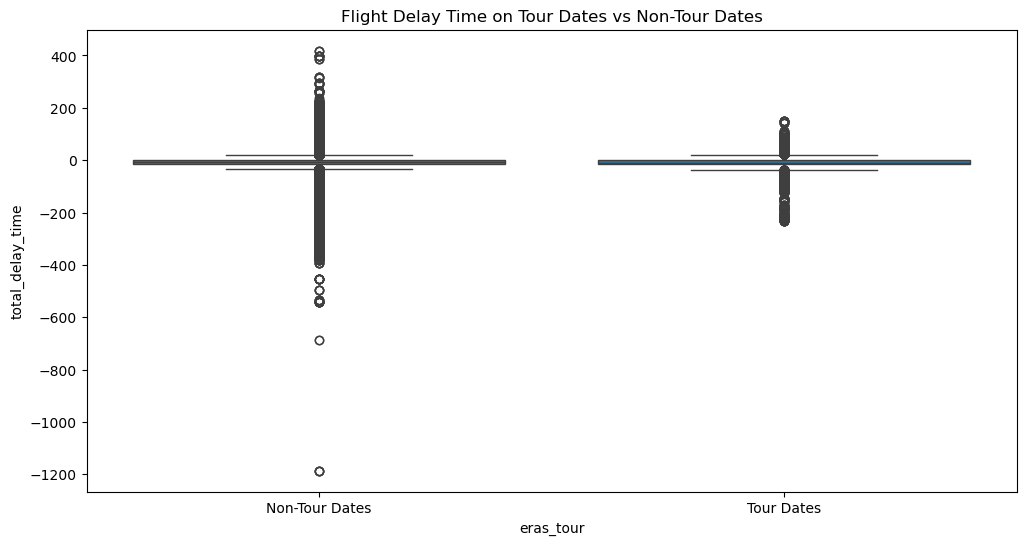

In [93]:
# Visualization of delay distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='eras_tour', y='total_delay_time', data=df)
plt.xticks([0, 1], ['Non-Tour Dates', 'Tour Dates'])
plt.title('Flight Delay Time on Tour Dates vs Non-Tour Dates')
plt.show()

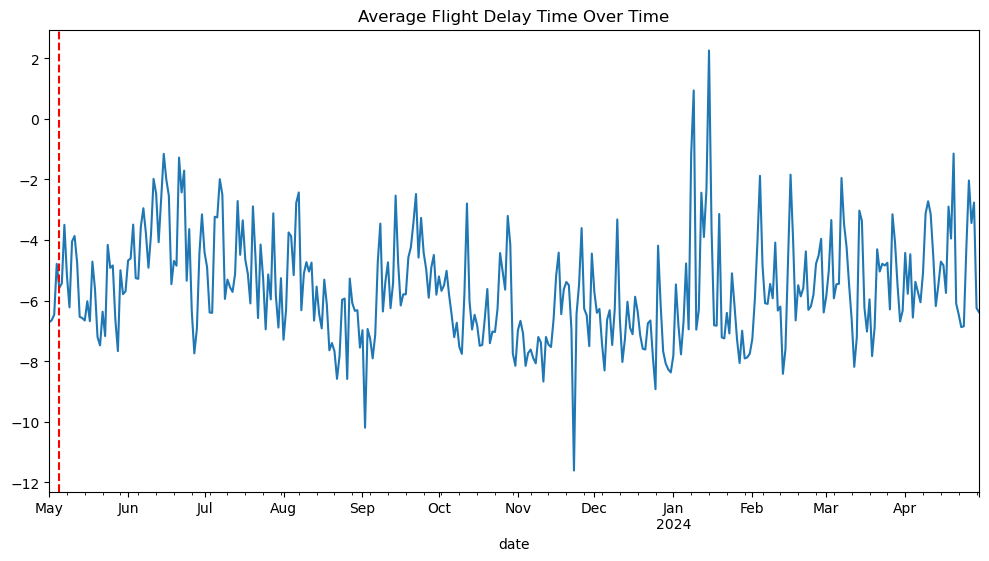

In [94]:
# Time series analysis of average delays
avg_delay_time = df.groupby('date')['total_delay_time'].mean()
avg_delay_time.plot(figsize=(12, 6), title='Average Flight Delay Time Over Time')
plt.axvline(x='2023-05-05', color='red', linestyle='--')  # Example tour date
plt.show()

In [95]:
##lOAD CSV TO WORK FROM HERE
df = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\final_combined_data.csv', low_memory=False)


In [96]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_d

In [97]:
# SAVE
# Save combined_data as CSV file
# combined_data_cleaned.to_csv('final_combined_data.csv', index=False)
# LAST SAVED 11.6.24 at 10:58am

In [98]:
#SAVE TO CSV 
df.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\final_combined_data.csv', index=False)
# LAST SAVED 11.06.24 at  8:223pm

The standard deviations are relatively high, suggesting considerable variability in delay times.

In [103]:
# Filter the DataFrame where 'eras_tour' is not NaN and 'nfl_game' is not 'no'
filtered_df = df[
    df['eras_tour'].notna() & (df['nfl_game'] != 'no')
]

# Display the first 5 rows of the filtered DataFrame
print(filtered_df.head(-5))


Empty DataFrame
Columns: [day_of_week, date, op_unique_carrier, tail_num, op_carrier_fl_num, origin_iata, origin_city, dest_iata, dest_city, crs_dep_time, dep_time, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, cancelled, diverted, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, origin_state, dest_state, origin_latitude, origin_longitude, dest_latitude, dest_longitude, type_of_airport, elevation_ft, municipality, scheduled_service, unique_id, id, length_ft, width_ft, surface, lighted, closed, le_ident, le_displaced_threshold_ft, he_ident, he_displaced_threshold_ft, latitude_orig, longitude_orig, elevation_orig, prcp_orig, snow_orig, snwd_orig, tmax_orig, tmin_orig, tobs, iata_dest_dest, weather_indicator, airport_indicator, total_delay_time, is_weekend, arrival_delay, departure_delay, airline_name, eras_tour, nfl_game, delay_columns, latitude_dest, longitude_dest, eleva

Model Summary:
R-squared: 0.114
This means that approximately 11.4% of the variance in adjusted_elapsed_time can be explained by the model. This is relatively low, indicating that other factors not included in the model may influence the delays.
F-statistic: 130.6 (p-value: 0.00)
The overall model is statistically significant, indicating that at least one of the predictors is significantly related to the response variable.

In [ ]:
print(filtered_data.columns.tolist())


F-statistic: A large F-statistic indicates that the variability explained by your model is significantly greater than the variability unexplained (the residual variance). This suggests that the model fits the data well.
p-value: A p-value of 0.0 (essentially) means that the null hypothesis (which states that all coefficients are equal to zero) can be rejected. This suggests that at least one of your predictors is significantly related to the delays.
Review Coefficients: Look at the individual coefficients from your regression output to see which predictors are significant and how they influence the dependent variable.
Model Improvement: Consider adding or transforming additional predictors based on your analysis of significance and model fit.
Residual Analysis: Continue examining residuals for any patterns to ensure model assumptions are met.
Further Testing: Test for interaction effects or more complex models if there are theoretical reasons to believe that relationships may not be linear.

R-squared and Adjusted R-squared:

R-squared: 0.864 suggests that approximately 86.4% of the variability in the adjusted_elapsed_time can be explained by the model. This is a strong indicator of a good fit.
Adjusted R-squared: 0.863 adjusts for the number of predictors in the model, indicating that adding or removing predictors doesn't lead to overfitting.

Coefficients:

Intercept (const): 48.0038 suggests the baseline time when all predictors are zero.
is_tour_window: The coefficient is 1.2541, but with a p-value of 0.282, it's not statistically significant at the 0.05 level. This means being in a tour window does not have a statistically significant effect on the adjusted elapsed time in this model.
weather_delay: The coefficient is -0.0513, also not statistically significant (p = 0.377), indicating that weather delays do not have a meaningful impact on elapsed time in this context.
distance: The coefficient of 0.1135 is highly significant (p < 0.001), meaning that for every unit increase in distance, the adjusted elapsed time increases significantly. This aligns with intuitive expectations that longer flights take more time.

Statistical Significance:

Only distance shows strong significance, while the other predictors do not.
Model Fit and Assumptions:

The F-statistic is very high (2659) with a p-value of 0.00, indicating that at least one predictor is significantly related to the response variable.
Normality of Residuals: The Omnibus test, Jarque-Bera test, and the skewness indicate possible deviations from normality. This could suggest a need to inspect residuals further for patterns or outliers.
Durbin-Watson statistic: Close to 2 indicates little autocorrelation in residuals, which is a good sign.

Multicollinearity:

The warning about a large condition number (2.70e+03) suggests potential multicollinearity among your predictors. Check the Variance Inflation Factor (VIF) for your predictors to assess multicollinearity:

Since all the VIF values forpredictors (excluding the constant) are around 1, this suggests that there are no issues with multicollinearity among them. I can confidently interpret the coefficients without concern for inflated standard errors.

# Q-Q Plot: Check how closely the points follow the diagonal line. Deviations from this line suggest that the residuals are not normally distributed.

Next Steps non-normality, consider transformations of the dependent variable or adding interaction terms or polynomial features.
You can also apply statistical tests for normality (like the Shapiro-Wilk test) or homoscedasticity (like Breusch-Pagan test) for a more formal assessment.

R-squared Value: The R-squared value has increased to around 0.171, which indicates that the model explains about 17.1% of the variance in the adjusted elapsed time. While this is an improvement, it still suggests that there might be other important predictors not included in the model. Adj. R-squared: 0.161
This value adjusts for the number of predictors in the model, providing a more accurate measure when comparing models with different numbers of predictors.

F-statistic: 17.12

The associated p-value (1.74e-41) indicates that the model as a whole is statistically significant, meaning at least one of the predictors is significantly related to the response variable.


Significant Predictors: Look closely at the coefficients and their p-values. For instance, the variables op_unique_carrier_b6, op_unique_carrier_f9, and others show significant coefficients (p < 0.05). This suggests they contribute meaningfully to the model.  

Coefficients:

The const (intercept) is approximately 102.48, meaning that when all predictors are zero, the estimated adjusted elapsed time is about 102.48 minutes.
The coefficients for the independent variables tell you how much the adjusted elapsed time is expected to increase (or decrease) with a one-unit increase in each predictor, holding all other predictors constant.
Key Predictors:

op_unique_carrier_aa: 22.46 (p < 0.001)
op_unique_carrier_b6: 57.98 (p < 0.001)
op_unique_carrier_nk: 59.46 (p < 0.001)
weather_delay: 0.0029 (p = 0.984)
The weather delay variable is not statistically significant, indicating that it does not contribute to explaining variations in adjusted elapsed time.
Airline Effects:

Several airlines (like B6, NK, and UA) show significant positive coefficients, suggesting that flights operated by these airlines tend to have longer delays compared to the reference category (which was dropped during one-hot encoding).

 Check for Multicollinearity
Although your VIF results from previous models showed no severe multicollinearity, keep an eye on the correlation between the one-hot encoded variables. High correlation could still affect the model.
Continue analyzing the residuals to check for homoscedasticity and normality. You previously mentioned using Q-Q plots; you can also employ residual plots to visualize the fit:

High VIF:
The constant term has a high VIF (18.10), which is expected, as it's a result of being included in the model.
The variable op_unique_carrier_aa shows a VIF of 3.11, which is still within acceptable limits but worth monitoring.

R-squared: 0.000, which means the model explains none of the variance in the dependent variable. This suggests that the predictors used (weather delay and is_tour_window) do not effectively capture the variation in the response variable.
F-statistic: 783.5 with a p-value of 0.00 indicates that at least one predictor is statistically significant in explaining the variance, but it doesn't tell us about the overall fit of the model


The regression results you provided indicate a few key points about your model:

Model Summary
Dependent Variable: log_adjusted_elapsed_time
R-squared: 0.000, which means the model explains none of the variance in the dependent variable. This suggests that the predictors used (weather delay and is_tour_window) do not effectively capture the variation in the response variable.
F-statistic: 783.5 with a p-value of 0.00 indicates that at least one predictor is statistically significant in explaining the variance, but it doesn't tell us about the overall fit of the model.
Coefficients
Intercept (const): 4.7850, which is the expected log-adjusted elapsed time when all predictors are zero.
weather_delay: Coefficient is 0.0002, meaning that for every unit increase in weather delay, the log-adjusted elapsed time increases by 0.0002 units. It is statistically significant (p-value = 0.000).
is_tour_window: Coefficient is 0.0141, suggesting that being in a tour window is associated with an increase in log-adjusted elapsed time by 0.0141 units. This is also statistically significant.